# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve,
)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

<b> Goals </b>

- Build a logistic regression classification model using the sci-kit learn library
- Describe the sigmoid function, odds, and odds ratios as well as how they relate to logistic regression
- Evaluate a model using metrics, such as: classification accuracy/error, confusion matrix, ROC / AOC curves, and loss functions

## Overview

- Logistic regression is a generalization of the linear regression model, adapted to classification problems
- Very popular because it's very fast and interpretable
- Not vulnerable to overfitting when you don't have many features
- In linear regression, we use a set of quantitative feature variables to predict a continuous response variable. In logistic regression, we use a set of quantitative feature variables to predict probabilities of class membership.
- Named for the function used at the core of the method, the logistic function (aka the sigmoid function)
- Logistic regression is a linear regression between our feature, X, and the log-odds of our data belonging to a certain class that we will call true for the sake of generalization

### Pros:

- Highly interpretable
- Model training and prediction are fast
- No tuning is required (most of the time)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

### Cons:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features

### Logit Formula:
![w](http://faculty.cas.usf.edu/mbrannick/regression/gifs/lo8.gif)

$a$ = intercept <br>
$b$ = coefficient value

### Logit Model:
![logit](https://camo.githubusercontent.com/0b115390d4832bfca4c423d6b9c3acdaa1ff01b3/68747470733a2f2f7170682e65632e71756f726163646e2e6e65742f6d61696e2d71696d672d3035656463313837336430313033653336303634383632613435353636646261)

The preceding graph represents the logistic function's ability to map our continuous input, x, to a smooth probability curve that begins at the left, near probability 0, and as we increase x, our probability of belonging to a certain class rises naturally and smoothly up to probability 1. 


In other words:

- Logistic regression gives an output of the probabilities of a specific class being true
- Those probabilities can be converted into class predictions: for example, if $p >= 0.5$, the models returns 1 and if $p < 0.5$, it returns 0
- Logistic function is S-shaped and will always produce values greater than 0 and less than 1
- As you know, not all relationships are linear, so LR is not always the right model

### Key difference in use of coefficients in linear regression vs. logistic regression


**Linear Regression:** Betas / coefficients represent the change in the **response variable** for a unit change in x

**Logistic Regression:** Betas / coefficients represent the change in the **log-odds ratio** for a unit change in x

## Modeling Time!

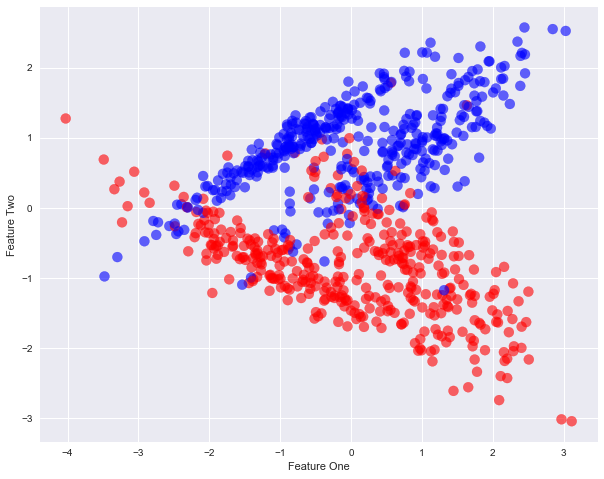

In [2]:
# Use sklearn to create fake data
data = make_classification(n_samples=800,
                           n_features=2,
                           class_sep=.89,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=42)

df = pd.DataFrame(data[0], columns=['feature_one', 'feature_two'])
df['target'] = data[1]

# Assign red to class 0 and blue to class 1 (for plotting purposes)
colors = df['target'].map({0: 'red', 1: 'blue'})

df.plot(x='feature_one', y='feature_two', kind='scatter', c=colors, s=100, alpha=0.6, figsize=(10,8))
plt.xlabel('Feature One')
plt.ylabel('Feature Two')

**If you had to draw a straight line that best separates the two classes, where would you put the line?**


Let's focus on feature_two and plot it against the target variable.

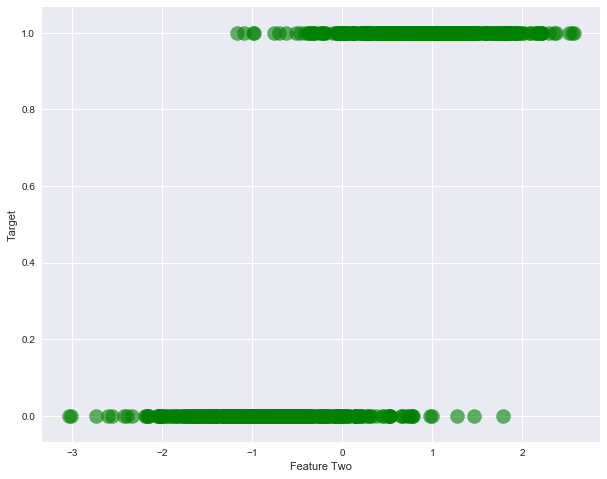

In [3]:
df.plot(x='feature_two', y='target', s=200, alpha=0.6, figsize=(10,8), kind='scatter', c='green')
plt.xlabel('Feature Two')
plt.ylabel('Target')

**Imagine a logit (or S-curve) modeling the relationship between the x and y axes.**

Let's fit a logistic regression model on the data above and plot the predicted labels and the probabilities

In [4]:
# Assign X and y
features = ['feature_two']
target = 'target'

X = df[features]
y = df[target]

In [5]:
# Intialize the logistic regression model
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Score the model 
score = lr.score(X,y)
print("The accuracy score is {:.1f}%.".format(score*100))

The accuracy score is 90.2%.


In [7]:
# Generate label predictions
lr.predict(X)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0,

Plot the probabilities and the predictions.

In [8]:
# Assign predictions to pred_labels
pred_labels = lr.predict(X)

In [9]:
# Assign probability of class 1 to pred_probs
pred_probs = lr.predict_proba(X)[:, 1]

In [10]:
# Combine the data together
preds = pd.DataFrame({'pred_labels': pred_labels, 'pred_probs': pred_probs})
preds = pd.concat([X, y, preds], axis=1).sort_values('feature_two')
preds.head()

,feature_two,target,pred_labels,pred_probs
739,-3.039890,0,0,0.000046
44,-3.012610,0,0,0.000051
711,-2.739166,0,0,0.000122
152,-2.607692,0,0,0.000187
68,-2.555669,0,0,0.000221


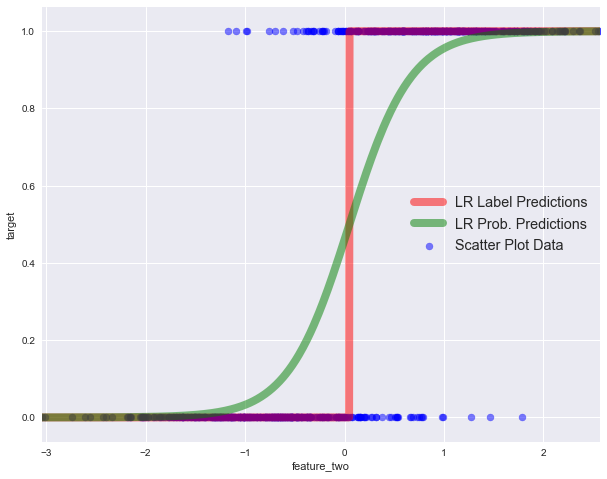

In [11]:
# Plot the data
ax = plt.gca()
plt.xlabel('Feature Two')
plt.ylabel('Target')

preds.plot(
    x='feature_two', 
    y='target', 
    c='blue', 
    s=50,
    alpha=0.5, 
    label='Scatter Plot Data', 
    kind='scatter', 
    ax=ax,
)

preds.plot(
    x='feature_two', 
    y='pred_labels', 
    c='red', 
    linewidth=8, 
    alpha=0.5, 
    label='LR Label Predictions', 
    kind='line',
    ax=ax,
)

preds.plot(
    x='feature_two', 
    y='pred_probs', 
    c='green', 
    linewidth=8, 
    alpha=0.5, 
    label='LR Prob. Predictions', 
    kind='line',
    ax=ax,
    figsize=(10,8)
)

plt.legend(loc="right", fontsize="x-large")

**What do you see? What is the graph showing us?**

Go back to the original dataset with two features and visualize the linear boundary.

In [12]:
# Plot visualizing function
def plot_decision_boundary(model, X, y):
    
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, alpha=0.4)
    
    plt.xlabel('Feature One')
    plt.ylabel('Feature Two')

In [13]:
# Create X and y variables from data using df
features = ['feature_one', 'feature_two']
target = 'target'

X = df[features]
y = df[target]

# Color code y
color = y.map({0:"blue", 1:"red"})

In [14]:
# Intialize model and fit it to X and y
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Imagine what the boundary would look like in this plot**

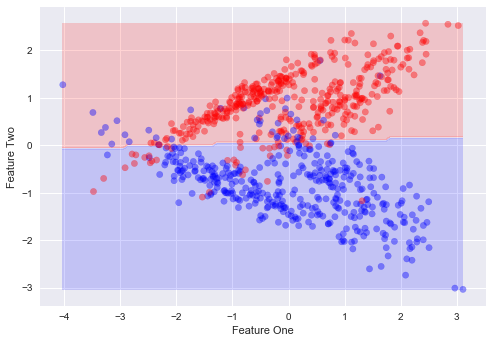

In [15]:
plot_decision_boundary(lr, X.values, color)

**This graph demonstrates the linearity of the logistic regression algorithm.**

In [16]:
# Print out the model intercept and coefficients
print('Intercept:'), lr.intercept_
print('Coefficients:'), lr.coef_

Intercept: [-0.22298685]
Coefficients: [[-0.11750725  3.25598308]]


### How do we interpret logistic regression coefficients?

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

**Examples:**

- Dice roll of 1: $probability = 1/6$, $odds = 1/5$
- Even dice roll: $probability = 3/6$, $odds = 3/3 = 1$
- Dice roll less than 5: $probability = 4/6$, $odds = 4/2 = 2$

$$odds = \frac {probability} {1 - probability}$$

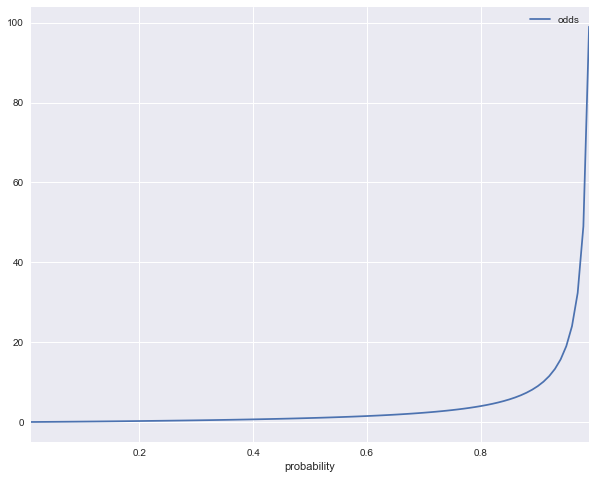

In [17]:
# Create a table of probability vs. odds
table = pd.DataFrame({'probability': np.arange(start=0.01, stop=1.0, step=0.01)})
table['odds'] = table['probability'] / (1 - table['probability'])
table.plot(x='probability', y='odds', kind='line', figsize=(10,8))

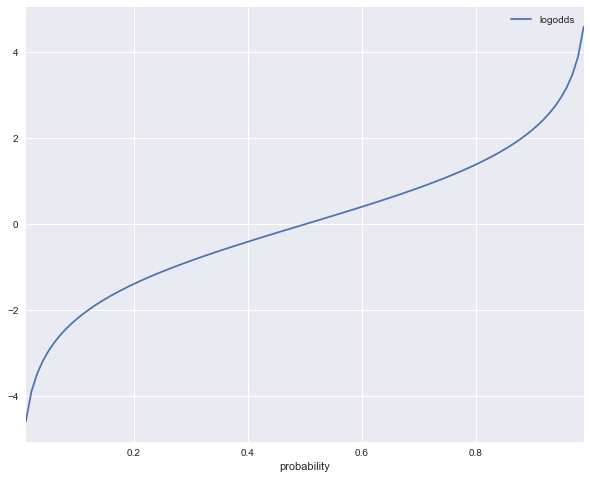

In [18]:
# Add the log-odds to the table by taking the **natural log** of the odds
table['logodds'] = np.log(table['odds'])
table.plot(x='probability', y='logodds', kind='line', figsize=(10,8))

**The log odds are passed through the logistic function.**

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

### Visualize how the coefficients and intercept can affect the probabilities

![logit](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/images/logistic_betas.png)

Changing the $\beta_0$ (or intercept) value shifts the curve horizontally, whereas changing the $\beta_1$ (or coefficient) value changes the slope of the curve.

## <b> Can you use Spotify data to predict whether or not I will like a song? </b>

In [19]:
# Example getting data using APIs
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify() 

with open('../../../spotify_credentials.json') as f:
    creds = json.load(f)
    client_id = creds['client_id']
    secret = creds['client_secret']

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

playlist = sp.user_playlist(1255971084, '4oKlWPG8WIMhemePCfCyxn') 
songs = playlist["tracks"]["items"] 
ids = [] 

for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 

features = sp.audio_features(ids) 
df = pd.DataFrame(features)

In [20]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.00159,https://api.spotify.com/v1/audio-analysis/1i1r...,0.642,227344,0.823,1i1rNVtxbE7rdFfpHuNq2j,0.000000,0,0.0776,-5.717,1,0.0289,122.977,4,https://api.spotify.com/v1/tracks/1i1rNVtxbE7r...,audio_features,spotify:track:1i1rNVtxbE7rdFfpHuNq2j,0.431
1,0.00136,https://api.spotify.com/v1/audio-analysis/1Sbx...,0.795,279507,0.606,1SbxAreKptHVvH3Q585wDd,0.000037,6,0.0756,-6.144,0,0.0618,127.987,4,https://api.spotify.com/v1/tracks/1SbxAreKptHV...,audio_features,spotify:track:1SbxAreKptHVvH3Q585wDd,0.417
2,0.34600,https://api.spotify.com/v1/audio-analysis/1qHa...,0.778,242733,0.547,1qHaLcG3LOeh6ZB8vii5ZZ,0.000302,2,0.1320,-7.273,1,0.0489,95.002,4,https://api.spotify.com/v1/tracks/1qHaLcG3LOeh...,audio_features,spotify:track:1qHaLcG3LOeh6ZB8vii5ZZ,0.441
3,0.02910,https://api.spotify.com/v1/audio-analysis/3bid...,0.641,258343,0.922,3bidbhpOYeV4knp8AIu8Xn,0.000000,2,0.0862,-4.457,1,0.0786,146.078,4,https://api.spotify.com/v1/tracks/3bidbhpOYeV4...,audio_features,spotify:track:3bidbhpOYeV4knp8AIu8Xn,0.847
4,0.72500,https://api.spotify.com/v1/audio-analysis/0yM3...,0.302,353920,0.381,0yM3VmM8gHEVGViKvAbQkc,0.000000,6,0.0338,-8.226,1,0.0342,83.165,3,https://api.spotify.com/v1/tracks/0yM3VmM8gHEV...,audio_features,spotify:track:0yM3VmM8gHEVGViKvAbQkc,0.285


## Attributes


    Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    
    Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

    Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
    Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    
    Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

    Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

    Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
More information here https://developer.spotify.com/web-api/get-audio-features/

In [21]:
# Load the spotify dataset
df = pd.read_pickle("../../data/Spotify_Data.pkl")
df.head()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,1,150.062,-8.795,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,1,160.083,-10.401,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,1,75.044,-7.148,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,1,86.468,-15.236,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0,174.004,-11.648,0.678,0.512000,0.904,0.561,1


Quick EDA: Summary stats and correlations

In [22]:
# Print summary stats
df.describe()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.612295,121.603272,-7.085624,0.618422,0.133286,0.496815,0.681577,0.505702
std,0.259989,0.487347,26.685604,3.761684,0.161029,0.273162,0.247195,0.210273,0.500091
min,0.000003,0.000000,47.859000,-33.097000,0.122000,0.000000,0.034800,0.014800,0.000000
25%,0.009630,0.000000,100.189000,-8.394000,0.514000,0.000000,0.295000,0.563000,0.000000
50%,0.063300,1.000000,121.427000,-6.248000,0.631000,0.000076,0.492000,0.715000,1.000000
75%,0.265000,1.000000,137.849000,-4.746000,0.738000,0.054000,0.691000,0.846000,1.000000
max,0.995000,1.000000,219.331000,-0.307000,0.984000,0.976000,0.992000,0.998000,1.000000


In [23]:
# Print summary stats for each label
df.groupby('target').mean()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy
target,,,,,,,,
0,0.221670,0.647944,120.666027,-6.811743,0.589648,0.091135,0.469836,0.673138
1,0.154279,0.577451,122.519382,-7.353329,0.646547,0.174486,0.523186,0.689826


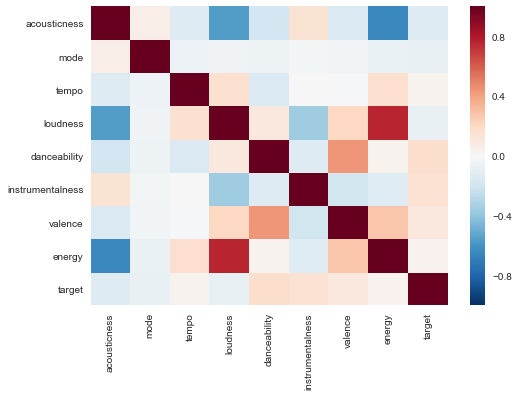

In [24]:
# Print correlation matrix
sns.heatmap(df.corr())

**Train a logistic regression model on the data to predict whether or not the user will like a certain song**

In [25]:
# Assign X and y
features = df.drop('target', axis=1).columns
target = 'target'

X = df[features]
y = df[target]

# Intialize, fit and score the model
lr = LogisticRegression()
lr.fit(X,y)
score = lr.score(X,y)

print("The model produces an accuracy score of {:.1f}%".format(score * 100))

The model produces an accuracy score of 64.0%


Is that a good or bad score? To find out, let's compare it to the null accuracy.

In [26]:
# Find the null accuracy (aka the benchmark score)
y.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

Let's make a table of the coefficients and odds

In [27]:
# Create a dataframe of coefficients and their values
coef = pd.DataFrame(zip(X.columns, lr.coef_[0]), columns=['feature', 'coef'])
coef

,feature,coef
0,acousticness,-1.608505
1,mode,-0.240678
2,tempo,0.003301
3,loudness,-0.108442
4,danceability,1.821116
5,instrumentalness,1.202698
6,valence,0.620524
7,energy,0.344893


**Odds ratio**: the ratio of the odds after increasing $X_i$ by 1 to the odds before increasing $X_i$ by 1. Therefore, $odds\_ratio - 1$ can be interpreted as the percentage change in the odds for a 1 unit change in $X_i$.

In [28]:
coef['odds_ratio'] = np.exp(coef['coef']) - 1
coef

,feature,coef,odds_ratio
0,acousticness,-1.608505,-0.799813
1,mode,-0.240678,-0.213905
2,tempo,0.003301,0.003306
3,loudness,-0.108442,-0.102769
4,danceability,1.821116,5.178751
5,instrumentalness,1.202698,2.329087
6,valence,0.620524,0.859902
7,energy,0.344893,0.411839


## Model Evaluation Techniques

![s](http://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

**True Positives (TP):** Number of correct positive predictions

**True Negatives (TN):** Number of correct negative predictions

**False Positives (FP):** Number incorrect positive predictions

**False Negatives (FN):** Number of incorrect negative predictions

**Recall** (also known as *sensitivity* or the *true positive rate*): Out of all the positive labels, what percentage were predicted correctly?

**Precision:** Out of all the positive predictions, what percentage have a positive label?

**False Positive Rate:** The number of incorrect positive predictions divided by number of negative labels

**True Negative Rate** (also known as *specificity*): The number of correct negative predictions divided by number of negative labels 

### Formula Table
![a](http://www.chioka.in/wp-content/uploads/2013/08/Metrics-Table.png)

### Confusion Matrix with Metrics

![s](https://eus-www.sway-cdn.com/s/4YEmvTlyess2YF1M/images/VfcIF1yrYJrvLl?quality=1071&allowAnimation=true)

Create confusion matrix for the Spotify data and calculate recall and precision scores

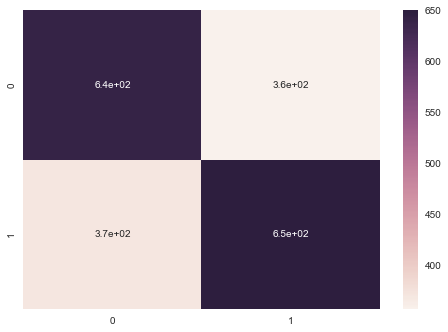

In [29]:
# Pass the targets and predictions into a confusion matrix
cm = confusion_matrix(y, lr.predict(X))
sns.heatmap(cm, annot=True)

If you were a spotify data scientist, would you want a model that produces more false negatives or false positives?

In [30]:
# Calculate precision and recall scores with sklearn
precision = float(precision_score(y, lr.predict(X)))
recall = float(recall_score(y, lr.predict(X)))

print("The precision is {:.1f}% and the recall is {:.1f}%.".format(precision * 100, recall * 100))

The precision is 64.5% and the recall is 63.7%.


No function for false positive (fall out) scores

### Area Under the ROC Curve (AUC)

![w](https://chrisalbon.com/images/machine_learning_flashcards/Receiver_Operating_Characteristic_print.png)

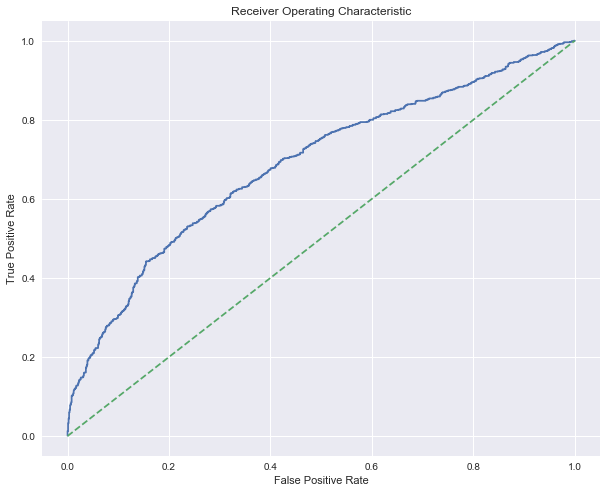

In [31]:
y_prob = lr.predict_proba(X)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y, y_prob)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [32]:
# Calculate the area under the curve using roc_auc_score
roc_auc_score(y, y_prob)

0.68698005782052041

**What is the relationship between the thresholds and FPR and TPR?**

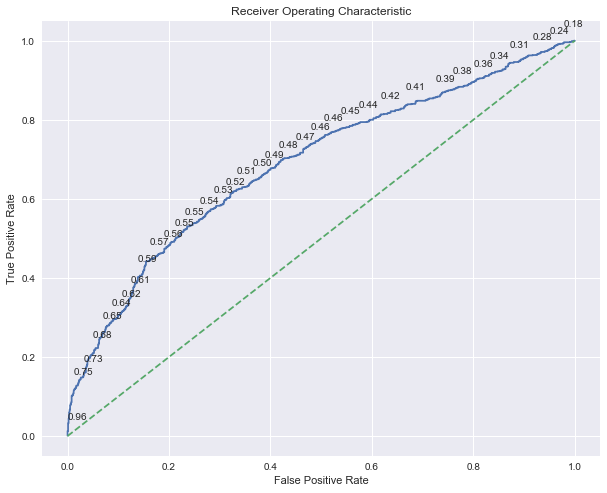

In [33]:
# Plot ROC_curve again but this time annotate the curve with the threshold value
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for label, x, y in zip(threshold[::25], false_positive_rate[::25], true_positive_rate[::25]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y + .04))

Let's plot threshold vs. FPR / TPR on the same plot

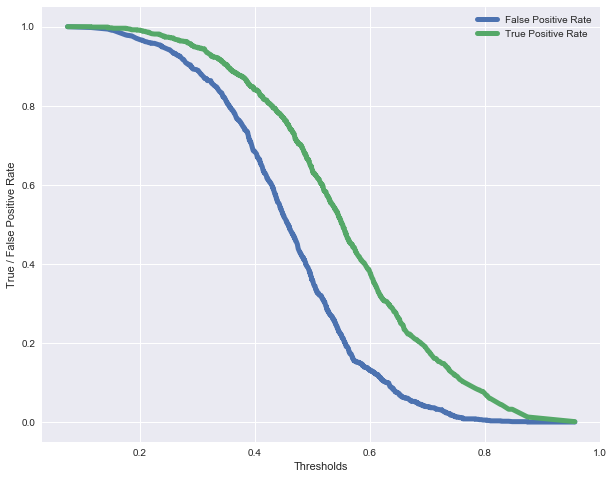

In [34]:
plt.figure(figsize=(10,8))

plt.plot(threshold, false_positive_rate, linewidth=5, label='False Positive Rate')
plt.plot(threshold, true_positive_rate, linewidth=5, label='True Positive Rate')

plt.xlabel('Thresholds')
plt.ylabel("True / False Positive Rate")
plt.legend()

What do you see here? Why are is there a negative correlation in both lines?

## Resources

Logistic regression:
- http://www.dataschool.io/guide-to-logistic-regression/
- https://onlinecourses.science.psu.edu/stat504/node/149
- https://www.youtube.com/watch?v=_Po-xZJflPM
- https://www.youtube.com/watch?v=gNhogKJ_q7U
- https://www.youtube.com/watch?v=fJ53tIDbvTM

Evalution:
- http://www.dataschool.io/roc-curves-and-auc-explained/
- http://people.inf.elte.hu/kiss/13dwhdm/roc.pdf
